In [43]:
import pandas 
df = pandas.read_csv('https://raw.githubusercontent.com/ltdaovn/dataset/master/ABC_customerSpending.csv')
X = df.loc[:, ['PRODUCT_CATE', 'CUST_ID', 'ORDER_COST']]

,PRODUCT_CATE,CUST_ID,ORDER_COST
0,ĐIỆN MÁY & CÔNG NGHỆ,CUS0000000,20780000.0
1,ĐIỆN MÁY & CÔNG NGHỆ,CUS0000001,50000.0
2,THỰC PHẨM,CUS0000002,955000.0
3,SỨC KHỎE & SẮC ĐẸP,CUS0000002,152000.0
4,THỰC PHẨM,CUS0000003,460162.0
...,...,...,...
92008,SỨC KHỎE & SẮC ĐẸP,CUS0075036,173400.0
92009,NHÀ CỬA & ĐỜI SỐNG,CUS0075037,150540.0
92010,NHÀ CỬA & ĐỜI SỐNG,CUS0075038,32500000.0
92011,Voucher dịch vụ,CUS0075039,501000.0


In [58]:

import numpy as np
from sklearn import preprocessing
le_product_cate = preprocessing.LabelEncoder().fit(X['PRODUCT_CATE'])
classes = list(le_product_cate.classes_)
a = 1
customer = {}
for each in X.iterrows():
    idx, row = each
    if not customer.get(row['CUST_ID'], None):
        customer[row['CUST_ID']] = {}
        for c in classes: 
            customer[row['CUST_ID']][c] = 0.
    customer[row['CUST_ID']][row['PRODUCT_CATE']] = row['ORDER_COST']

In [71]:
X = pandas.DataFrame(customer).T
print(X)

            MẸ & BÉ  NHÀ CỬA & ĐỜI SỐNG  Sách, VPP & Âm nhạc  \
CUS0000000      0.0                 0.0                  0.0   
CUS0000001      0.0                 0.0                  0.0   
CUS0000002      0.0                 0.0                  0.0   
CUS0000003      0.0            646512.0                  0.0   
CUS0000004      0.0                 0.0                  0.0   
...             ...                 ...                  ...   
CUS0075036      0.0            647800.0                  0.0   
CUS0075037      0.0            150540.0                  0.0   
CUS0075038      0.0          32500000.0                  0.0   
CUS0075039      0.0                 0.0                  0.0   
CUS0075040      0.0                 0.0                  0.0   

            SỨC KHỎE & SẮC ĐẸP  THỜI TRANG  THỰC PHẨM  Voucher dịch vụ  \
CUS0000000                 0.0         0.0        0.0              0.0   
CUS0000001                 0.0         0.0        0.0              0.0   
CUS000000

In [78]:
print(X)
# Tính inertia (i.e Tổng khoảng cách của các điểm (mặc định là khoảng cách euclide) tới tâm nhóm của nó) để tìm k thích hợp)
from sklearn.cluster import KMeans
inertias = []
for i in range(1, 11):
    model = KMeans(n_clusters=i).fit(X)
    inertias.append(model.inertia_)

            MẸ & BÉ  NHÀ CỬA & ĐỜI SỐNG  Sách, VPP & Âm nhạc  \
CUS0000000      0.0                 0.0                  0.0   
CUS0000001      0.0                 0.0                  0.0   
CUS0000002      0.0                 0.0                  0.0   
CUS0000003      0.0            646512.0                  0.0   
CUS0000004      0.0                 0.0                  0.0   
...             ...                 ...                  ...   
CUS0075036      0.0            647800.0                  0.0   
CUS0075037      0.0            150540.0                  0.0   
CUS0075038      0.0          32500000.0                  0.0   
CUS0075039      0.0                 0.0                  0.0   
CUS0075040      0.0                 0.0                  0.0   

            SỨC KHỎE & SẮC ĐẸP  THỜI TRANG  THỰC PHẨM  Voucher dịch vụ  \
CUS0000000                 0.0         0.0        0.0              0.0   
CUS0000001                 0.0         0.0        0.0              0.0   
CUS000000

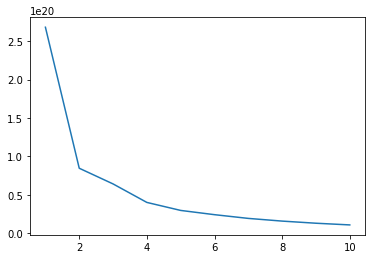

In [73]:
# Plot để tìm k thích hợp
import matplotlib.pyplot as plt
plt.plot(range(1, 11), inertias)
plt.show()

In [79]:
# Tiến hành chọn k = 3
k = 3
model = KMeans(n_clusters=k).fit(X)
Y = model.predict(X)
print(Y)
print(np.unique(Y, return_counts=True))

[0 0 0 ... 0 0 0]
(array([0, 1], dtype=int32), array([75039,     2]))
